In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


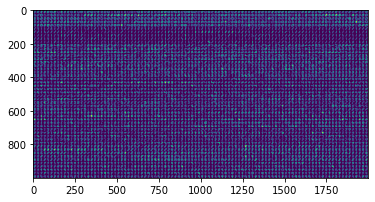

In [3]:
## Import image
input_image = cv2.imread(r'C:\Users\saket\Desktop\courses\TF\OpenCV\Master OpenCV\images\digits.png')
gray = cv2.cvtColor(input_image,cv2.COLOR_BGR2GRAY)
small_size = cv2.pyrDown(input_image)
plt.imshow(gray)

In [4]:
## Converting image to 4D array
cell = [np.hsplit(row,100) for row in np.vsplit(gray,50)] ## Returns a list

In [5]:
## convert list to array
x = np.array(cell)
print(x.shape)

(50, 100, 20, 20)


In [6]:
## Train test split
train = x[:,:70].reshape(-1,400).astype(np.float32)
test = x[:,70:100].reshape(-1,400).astype(np.float32)

In [7]:
## Data Labelling
i = [0,1,2,3,4,5,6,7,8,9]
train_lable = np.repeat(i,350)[:,np.newaxis]
test_lable = np.repeat(i,150)[:,np.newaxis]

In [8]:
## Training the KNN
knn = cv2.ml.KNearest_create()
knn.train(train,cv2.ml.ROW_SAMPLE,train_lable)
ret,result,neighbour,distnace = knn.findNearest(test,k=3)

In [9]:
match = result == test_lable
correct = np.count_nonzero(match)
accuracy = correct*(100.0/result.size)
print(accuracy)

93.46666666666667


In [59]:
def get_contour(contour):
    M = cv2.moments(contour)      
    return (int(M['m10']/M['m00']))
    

In [149]:
## Finding contours and bounding boxes


def makeSquare(not_square):
    ## padding in the image to make it like the input data
    black = [0,0,0]
    image_dimensions = not_square.shape
    h = image_dimensions[0]
    w = image_dimensions[1]

    if (h==w):
        square = not_square
        return square
    else:
        doublesize = cv2.resize(not_square,(2*w,2*h),interpolation=cv2.INTER_CUBIC)
        h = h*2
        w = w*2
        if (h>w):
            add_padding = int((h-w)/2)
            doublesize_sq = cv2.copyMakeBorder(doublesize,0,0,add_padding, add_padding, cv2.BORDER_CONSTANT,value = black)

        else:
            add_padding = int((w-h)/2)
            doublesize_sq = cv2.copyMakeBorder(doublesize,add_padding,add_padding,0,0,cv2.BORDER_CONSTANT,value = black)
    
    doublesize_sq_dimension = doublesize_sq.shape
    return doublesize_sq

def resize_image(dimensions,input_image):
    
    buffer = 4
    dimensions = dimensions-buffer
    square = input_image
    print('dimensions ',float(dimensions))
    print('square.shape[1] ',square.shape[1])
    r = float(dimensions)/square.shape[1]
    print('r ',r)
    print(float(dimensions)/square.shape[1]*r)
    print(float(dimensions)/square.shape[1]*r)
    dim = (dimensions,dimensions)

    print('dim ',dim)
    resized = cv2.resize(input_image,dim,interpolation=cv2.INTER_AREA)
    image_dimension_2 = resized.shape
    print(image_dimension_2)
    
    h_r = image_dimension_2[0]
    h_w = image_dimension_2[1]
    black = [0,0,0]
    if (h_r>h_w):
        resize = cv2.copyMakeBorder(resized,0,0,0,1,cv2.BORDER_CONSTANT,value = black)
    if (h_r<h_w):
        resize = cv2.copyMakeBorder(resized,1,0,0,0,cv2.BORDER_CONSTANT,value = black)
    p = 2
    resized_image = cv2.copyMakeBorder(resized,p,p,p,p,cv2.BORDER_CONSTANT,value = black)
    image_dimension = resized_image.shape
    #print(image_dimension)
    h = image_dimension[0]
    w = image_dimension[1]
    return resized_image

In [153]:
## Processing the input image for classification

def process_input_image(image):
    ## Gray out image
    gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

    ## Blur image
    blur = cv2.GaussianBlur(gray,(5,5),0)

    ## Canny Edges
    canny = cv2.Canny(blur,30,150)

    ## find contour
    contours,_ = cv2.findContours(canny.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    filter_contour = [c for c in contours if cv2.contourArea(c)>10]
    sorted_contour = sorted(filter_contour,key = get_contour,reverse = False)

    ## Empty array
    full = []

    ## Loop contours and filter any small boxes
    for i in sorted_contour:
        (x,y,w,h) = cv2.boundingRect(i)

        if w>5 and h>=25:
            roi = blur[y:y+h,x:x+w]
            ret,roi = cv2.threshold(roi,127,255,cv2.THRESH_BINARY_INV)
            squared = makeSquare(roi)
            final = resize_image(20,squared)
#            print(final.shape)
            final_Array = final.reshape((1,400))
            final_Array = final_Array.astype(np.float32)

            ret,result,neigh,dist = knn.findNearest(final_Array,k=1)
            n = str(int(float(result[0])))
            full.append(n)

            ## Create a rectange around the classfied image
            cv2.rectangle(image,(x,y),(x+w,y+h),(0,0,255),2)
            cv2.putText(image,n,(x,y+155),cv2.FONT_HERSHEY_COMPLEX,2,(255,0,0),2)
            plt.imshow(image)


In [137]:
input_image = cv2.imread(r'C:\Users\saket\Desktop\courses\TF\OpenCV\Master OpenCV\images\numbers.jpg')

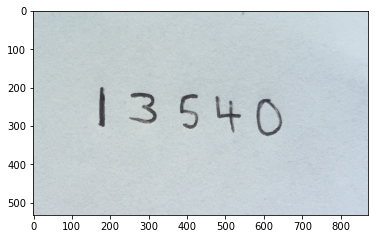

In [138]:
plt.imshow(input_image)

dimensions  16.0
square.shape[1]  206
r  0.07766990291262135
0.006032613818456027
0.006032613818456027
dim  (16, 16)
(16, 16)
dimensions  16.0
square.shape[1]  164
r  0.0975609756097561
0.009518143961927425
0.009518143961927425
dim  (16, 16)
(16, 16)
dimensions  16.0
square.shape[1]  182
r  0.08791208791208792
0.007728535201062675
0.007728535201062675
dim  (16, 16)
(16, 16)
dimensions  16.0
square.shape[1]  192
r  0.08333333333333333
0.006944444444444444
0.006944444444444444
dim  (16, 16)
(16, 16)
dimensions  16.0
square.shape[1]  196
r  0.08163265306122448
0.006663890045814243
0.006663890045814243
dim  (16, 16)
(16, 16)


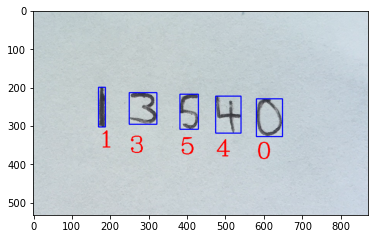

In [154]:
process_input_image(input_image)